# Insurance Claims- Fraud Detection

Description: With help of ML we can help to solve Insurance fraud problem. In this dataset we'll be working on different models to predict
    whether  if an insurance claim is fraudulent or not. In this datset there are different kind of features that will to get this prediction.
    This problem is classification type, so will be using all classification algorithms to predict the insurance claim is fraud or not?
    

# Importing all Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


In [2]:
#Getting the Dataset

In [3]:
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

So here we can see that total there are 40columns and 1000 rows. In this dataset there are 2 float type, 17 intezer type, 21 object type columns are there.


In [7]:
#checking null values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here we can see that only 1 column has null values that is _c39 in which all values are null. As this column has no contribution in prediction bcoz of all 
null values thus we can drop it.

In [9]:
# Dropping _c39 columns 
df.drop('_c39',axis=1,inplace=True)

In [10]:
#Statistical Summary

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Above table displays the statistical summary of all numerical columns.
 It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

# Data Cleaning

In [12]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [13]:
#converting the policy_bind_date datetype 

In [14]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [16]:
#checking object unique values in object type caloumns

In [17]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


Thus in above list we can see the number of unique values of object type columns

We are droppping few columns which are not useful

In [18]:
drop_columns = ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']
df = df.drop(drop_columns, axis = 1)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,MALE,MD,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-06-09,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Here we can observe that fraud_reported is going to be our target column. We will convert it to 1 and 0.

In [19]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [20]:
df['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

# EDA

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

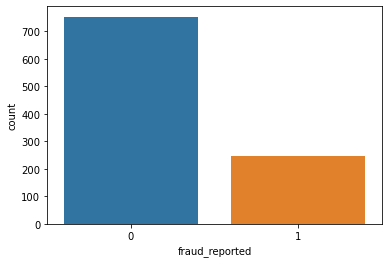

In [21]:
sns.countplot(df['fraud_reported'])

Here we can see that fraud reported is around 250 while fraud not reported is more than 700.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_deductable            1000 non-null   int64         
 5   policy_annual_premium        1000 non-null   float64       
 6   umbrella_limit               1000 non-null   int64         
 7   insured_zip                  1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_hobbies              1000 non-null  

In [23]:
categorical_columns=['insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity',
                      'authorities_contacted','insured_hobbies','auto_model','auto_make','property_damage']

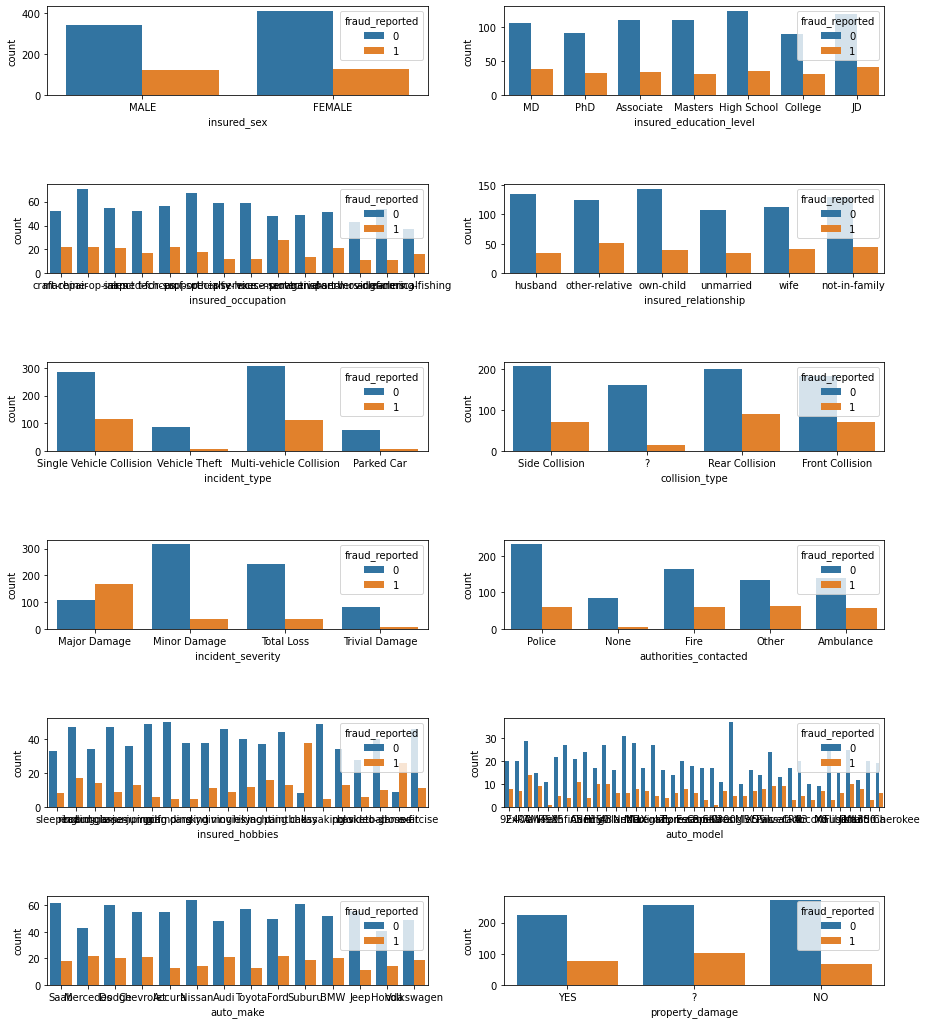

In [24]:
fig,axes = plt.subplots(6,2,figsize=(15,18))
for idx,cate_col in enumerate(categorical_columns):
    rows,col = idx//2,idx%2
    sns.countplot(x=cate_col,data=df,hue='fraud_reported',ax=axes[rows,col])
plt.subplots_adjust(hspace=1)

From above graphs we can observe the relationship between targeted column to all categorical columns.

We are dropping few columns which are not useful in predicting the insurance fraud prediction

In [25]:
df = df.drop(['age', 'months_as_customer', 'policy_deductable'], axis = 1)
df.columns

Index(['policy_number', 'policy_bind_date', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
#checking the count of required columns

In [27]:
required_columns = ['policy_number',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved',
       'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim',
      'fraud_reported']

print(len(required_columns))

20


# Checking Correlation

In [28]:
df1 = df[required_columns]

In [29]:
df1.corr()

,policy_number,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
policy_number,1.000000,0.009802,-0.005669,0.000113,0.013432,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.029443
capital-gains,0.009802,1.000000,-0.046904,-0.016406,0.061643,-0.017651,0.015980,0.025934,-0.000779,0.015836,-0.019173
capital-loss,-0.005669,-0.046904,1.000000,-0.025054,-0.014895,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.014863
incident_hour_of_the_day,0.000113,-0.016406,-0.025054,1.000000,0.120794,0.006527,0.217702,0.165768,0.179536,0.215626,0.004316
number_of_vehicles_involved,0.013432,0.061643,-0.014895,0.120794,1.000000,-0.014669,0.274278,0.224650,0.219084,0.269393,0.051839
witnesses,-0.012661,-0.017651,-0.041330,0.006527,-0.014669,1.000000,-0.011114,-0.024843,0.052640,-0.022564,0.049497
total_claim_amount,-0.018009,0.015980,-0.036060,0.217702,0.274278,-0.011114,1.000000,0.805025,0.810686,0.982773,0.163651
injury_claim,-0.008762,0.025934,-0.046060,0.165768,0.224650,-0.024843,0.805025,1.000000,0.563866,0.722878,0.090975
property_claim,-0.010678,-0.000779,-0.022863,0.179536,0.219084,0.052640,0.810686,0.563866,1.000000,0.732090,0.137835
vehicle_claim,-0.020184,0.015836,-0.032665,0.215626,0.269393,-0.022564,0.982773,0.722878,0.732090,1.000000,0.170049


<AxesSubplot:>

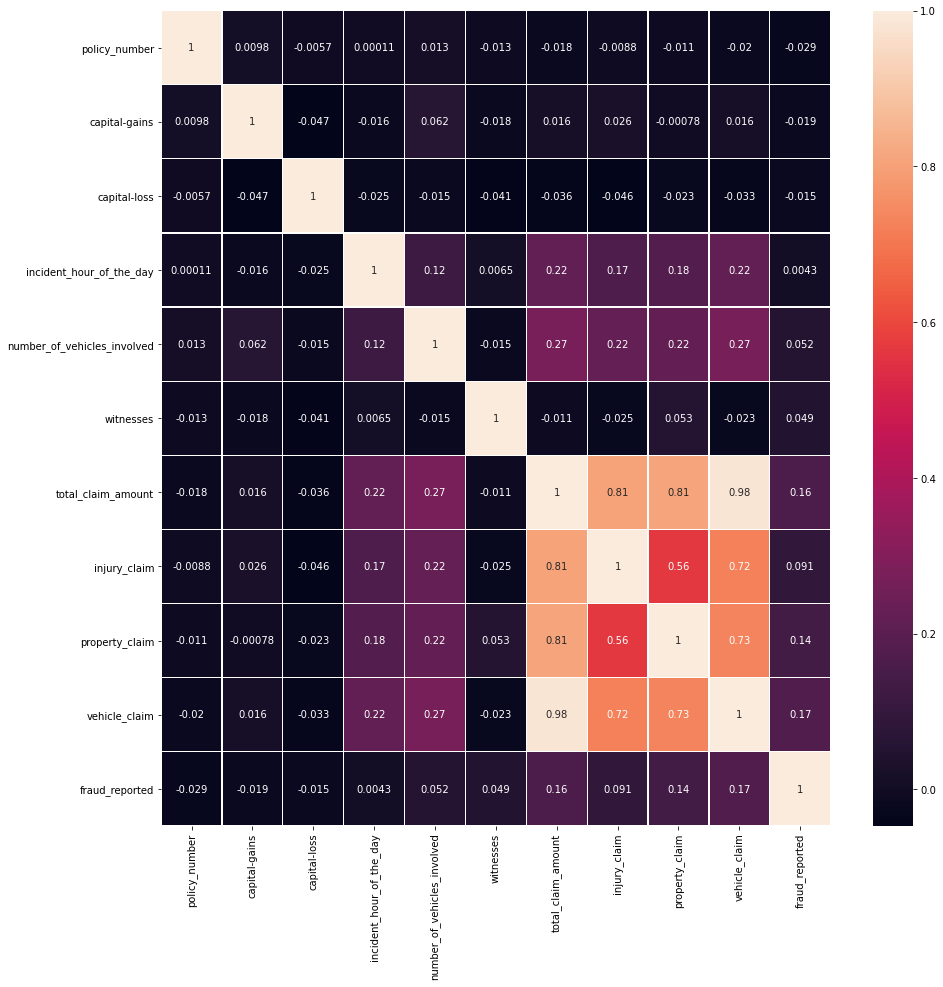

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,linewidths=0.2)

From above graph we can see high correlation b/w vehicle_claim, injury_claim,property_claim, total_claim_amount. 
We will remove the other 3 columns and only keep total_claim_amount as it captures the information and removes collinearity.

In [31]:
required_columns = [
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved',
       'witnesses', 'total_claim_amount',
      'fraud_reported']

print(len(required_columns))

16


In [32]:
df2 = df1[required_columns]
df2.head()

,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported
0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,2,71610,1
1,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,0,5070,1
2,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,3,34650,0
3,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,2,63400,1
4,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,1,6500,0


In [33]:
df2.dtypes

insured_sex                    object
insured_education_level        object
insured_occupation             object
insured_hobbies                object
insured_relationship           object
capital-gains                   int64
capital-loss                    int64
incident_type                  object
collision_type                 object
incident_severity              object
authorities_contacted          object
incident_hour_of_the_day        int64
number_of_vehicles_involved     int64
witnesses                       int64
total_claim_amount              int64
fraud_reported                  int32
dtype: object

# Label encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
categories= ['insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type',
            'collision_type','incident_severity','authorities_contacted']
LE= LabelEncoder()
for i in categories:
    df2[i] = LE.fit_transform(df2[i]) 

In [35]:
df2.dtypes

insured_sex                    int32
insured_education_level        int32
insured_occupation             int32
insured_hobbies                int32
insured_relationship           int32
capital-gains                  int64
capital-loss                   int64
incident_type                  int32
collision_type                 int32
incident_severity              int32
authorities_contacted          int32
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
witnesses                      int64
total_claim_amount             int64
fraud_reported                 int32
dtype: object

In [36]:
df2.head(10)

,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported
0,1,4,2,17,0,53300,0,2,3,0,4,5,1,2,71610,1
1,1,4,6,15,2,0,0,3,0,1,4,8,1,0,5070,1
2,0,6,11,2,3,35100,0,0,2,1,4,7,3,3,34650,0
3,0,6,1,2,4,48900,-62400,2,1,0,4,5,1,2,63400,1
4,1,0,11,2,4,66000,-46000,3,0,1,2,20,1,1,6500,0
5,0,6,12,3,4,0,0,0,2,0,1,19,3,2,64100,1
6,1,6,9,2,0,0,-77000,0,1,1,4,0,3,0,78650,0
7,1,0,12,0,4,0,0,0,1,2,4,23,3,2,51590,0
8,0,6,7,9,3,0,0,2,1,2,4,21,1,1,27700,0
9,1,6,8,4,5,0,-39300,2,2,2,3,14,1,1,42300,0


# Spilitting in X and Y

In [37]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC

In [38]:
features = []
for col in df2.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

x = df2[features]
y = df2[target]


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

# Model Building

# Logistic Regression

In [41]:
LR = LogisticRegression()

LR.fit(x_train, y_train)
preds = LR.predict(x_test)

score = LR.score(x_test, y_test)
print(score)

0.716


In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       180
           1       0.40      0.03      0.05        70

    accuracy                           0.72       250
   macro avg       0.56      0.51      0.44       250
weighted avg       0.63      0.72      0.61       250



In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)

In [44]:
print("cross validation score of Logistic Regression model :",scr.mean())

cross validation score of Logistic Regression model : 0.7459999999999999


Thus our predictions are almost 72% accurate, i.e. for our logistic regression model.
and the Cross Validation score is 75% 

# DecisionTreeClassifier

In [45]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
preds = dtc.predict(x_test)

score = dtc.score(x_test, y_test)
print(score)
print()
print(classification_report(y_test, preds))

0.776

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       180
           1       0.61      0.56      0.58        70

    accuracy                           0.78       250
   macro avg       0.72      0.71      0.71       250
weighted avg       0.77      0.78      0.77       250



In [46]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x,y,cv=5)

In [47]:
print("cross validation score of DecisionTreeClassifier model :",scr.mean())

cross validation score of DecisionTreeClassifier model : 0.7630000000000001


Thus our predictions are almost 79% accurate, i.e. for our DecisionTreeClassifier model.
and the Cross Validation score is 77% 

# RandomForestClassifier model

In [48]:
RFC = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [49]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [50]:
predRFC=RFC.predict(x_test)

In [51]:
print('The accuracy of the Randonforestclassifier is',metrics.accuracy_score(predRFC,y_test))

The accuracy of the Randonforestclassifier is 0.776


In [52]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(RFC,x,y,cv=5)

In [53]:
print("cross validation score of RandomForestClassifier model :",scr.mean())

cross validation score of RandomForestClassifier model : 0.795


Thus our predictions are almost 78% accurate, i.e. for our RandomForestClassifier model.
and the Cross Validation score is 80% 

# SVC

In [54]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
print('Score:' , svc.score(x_test, y_test))
print('Classification report:', classification_report(y_test, preds))

Score: 0.72
Classification report:               precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)

In [ ]:
print("cross validation score of SVC model :",scr.mean())

Thus our predictions are almost 72% accurate, i.e. for our SVC model. and the Cross Validation score is 76%

# Hyper Parameter Tuning

From above modelling analysis we can conclude that model RandomForestClassifier act as best model in prediction. Thus we'll be performing
hyper parameter tuning on it.

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#Creating Parameters

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,x_test,y_test)

In [ ]:
#Best Model Prediction on test data
sub = best_random.predict(test)
sub

# Saving The Model

In [ ]:
import joblib

In [ ]:
joblib.dump(LR_cv.best_estimator_,"Automobile_insurance_fraudModelIDTC.pkl")

In [ ]:
Conclusion: So here the best model 'RandomForestClassifier' has been saved to calculate the best accuracy score and predict outcomes on new data.